## Pymaceuticals Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
# Viewing data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Viewing data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

In [5]:
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Source: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
mouse_study[mouse_study[['Mouse ID', 'Timepoint']].duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.drop((mouse_study[mouse_study['Mouse ID'] == 'g989'].index), inplace = True)

In [10]:
study_clean_data = mouse_study
study_clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
len(study_clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_groupby = study_clean_data.groupby('Drug Regimen')
study_mean_drug = drug_groupby['Tumor Volume (mm3)'].mean()
study_median_drug = drug_groupby['Tumor Volume (mm3)'].median()
study_variance_drug = drug_groupby['Tumor Volume (mm3)'].var()
study_standard_dev_drug = drug_groupby['Tumor Volume (mm3)'].std()
study_sem_drug = drug_groupby['Tumor Volume (mm3)'].sem()

In [27]:
study_median_drug

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_table = {
    'Mean': study_mean_drug,
    "Median": study_median_drug,
    'Variance': study_variance_drug,
    'Standard Deviation': study_standard_dev_drug,
    'Standard Error of Mean(SEM)': study_sem_drug
}

regimen_desc = pd.DataFrame(summary_table)


# Using the aggregation method, produce the same summary statistics in a single line


In [29]:
pd.DataFrame(summary_table)

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean(SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

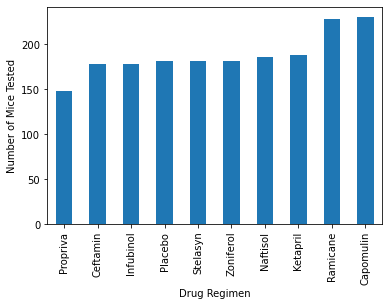

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_groupby = study_clean_data.groupby('Drug Regimen')
study_mice_drug = drug_groupby['Mouse ID'].count()
drug_mice_ct = study_mice_drug.to_frame()
drug_mice_ct = drug_mice_ct.rename(columns = {"Mouse ID": 'Count of Mice'})
drug_mice_ct = drug_mice_ct.sort_values(by=['Count of Mice'])
drug_mice_ct.plot(kind ='bar', ylabel = 'Number of Mice Tested', legend = False)

([<matplotlib.axis.XTick at 0x1885081c2b0>,
 [Text(0, 0, 'Propriva'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Zoniferol'),
  Text(6, 0, 'Naftisol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Ramicane'),
  Text(9, 0, 'Capomulin')])

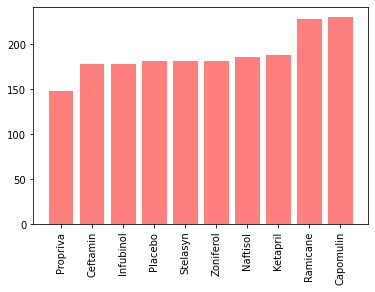

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_mice_ct))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_mice_ct["Count of Mice"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_mice_ct.index.values, rotation="vertical")

<AxesSubplot:title={'center':'Mice Gender Distribution'}, ylabel='Sex'>

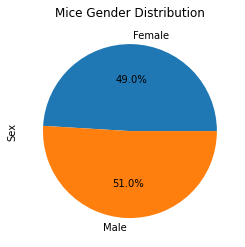

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drug_groupby_gender = study_clean_data.groupby('Sex')
study_mice_gender = drug_groupby_gender['Mouse ID'].count()
gender_mice_ct = study_mice_gender.to_frame()
gender_mice_ct = gender_mice_ct.rename(columns = {"Mouse ID": 'Count of Mice'})
gender_mice_ct = gender_mice_ct.sort_values(by=['Count of Mice'])
gender_mice_ct.plot(y='Count of Mice', kind ='pie', autopct="%1.1f%%", ylabel = 'Sex', title = 'Mice Gender Distribution', legend = False)

Text(0, 0.5, 'Sex')

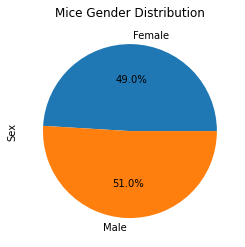

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice_ct['Count of Mice'], labels = ['Female', 'Male'], autopct="%1.1f%%")
plt.title("Mice Gender Distribution")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_drug_id = study_clean_data.groupby(['Drug Regimen', 'Mouse ID'])
study_last_timepoint = groupby_drug_id['Timepoint'].max()
last_timepoint = pd.DataFrame(study_last_timepoint)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = pd.merge(last_timepoint, study_clean_data, how = 'left', on = ['Drug Regimen', 'Mouse ID', 'Timepoint'])

In [57]:
study_data_last_time = pd.merge(study_clean_data, last_timepoint, how = 'outer', on = ['Drug Regimen', 'Mouse ID'], suffixes = ('_original', '_final'))
study_data_last_time

,Mouse ID,Drug Regimen,Sex_original,Age_months_original,Weight (g)_original,Timepoint_original,Tumor Volume (mm3)_original,Metastatic Sites_original,Timepoint_final,Sex_final,Age_months_final,Weight (g)_final,Tumor Volume (mm3)_final,Metastatic Sites_final
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,Male,21,16,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,Male,21,16,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,Male,21,16,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,Male,21,16,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,Male,21,16,22.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45,Male,9,30,73.867845,4
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45,Male,9,30,73.867845,4
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45,Male,9,30,73.867845,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45,Male,9,30,73.867845,4


In [65]:
study_data_last_time = study_data_last_time.drop(columns = ['Sex_final', 'Age_months_final', 'Weight (g)_final'])

In [50]:
# initial_timepoint = study_clean_data.loc[(study_clean_data['Timepoint'] == 0), :]
# initial_timepoint

In [49]:
# initial_last_timepoint = pd.merge(initial_timepoint, last_timepoint, how = 'left', on = ['Drug Regimen', 'Mouse ID'], suffixes = ('_initial', '_final'))
# initial_last_timepoint

In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = study_data_last_time['Drug Regimen'].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = []
for regimen in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_df = last_timepoint.loc[last_timepoint['Drug Regimen'] == regimen]

    # add subset 
    quartiles = regimen_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])  
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    outlier_occupancy = regimen_df.loc[(regimen_df['Tumor Volume (mm3)'] < lower_bound) | (regimen_df['Tumor Volume (mm3)'] > upper_bound)]
    outliers.append((regimen, outlier_occupancy['Mouse ID'].count()))
    
outliers

[('Ramicane', 0),
 ('Capomulin', 0),
 ('Infubinol', 1),
 ('Placebo', 0),
 ('Ceftamin', 0),
 ('Stelasyn', 0),
 ('Zoniferol', 0),
 ('Ketapril', 0),
 ('Propriva', 0),
 ('Naftisol', 0)]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
